In [6]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
print(os.listdir("/Users/ravinitchand/Desktop/DSProject/chest_xray"))

['PythonCode', '.DS_Store', 'test', 'train', 'val']


In [74]:
#show different folders
mainDIR = os.listdir('/Users/ravinitchand/Desktop/DSProject/chest_xray')
print(mainDIR)
train_folder = '/Users/ravinitchand/Desktop/DSProject/chest_xray/train/'
val_folder = '/Users/ravinitchand/Desktop/DSProject/chest_xray/val/'
test_folder = '/Users/ravinitchand/Desktop/DSProject/chest_xray/test/'

In [75]:
## Identifying the NORMAL AND PNEUMONIA sets in the train folder
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

In [4]:
## Finding a random picture from the normal folder
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

1342
normal picture title:  NORMAL2-IM-1406-0001.jpeg


In [5]:
## Finding a random picture from the Pneumonia Folder
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

pneumonia picture title: person1323_bacteria_3363.jpeg


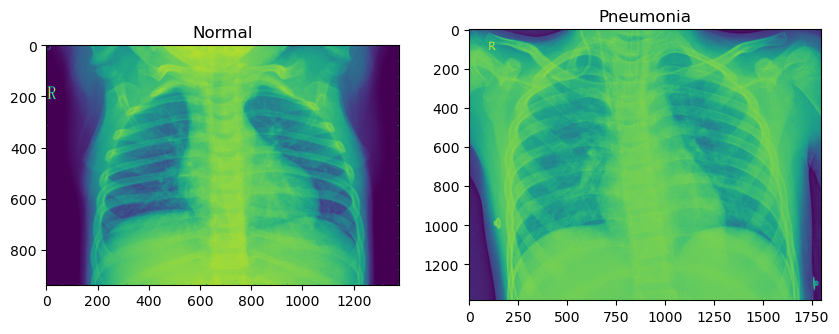

In [6]:
## Loading the random images into Python and plotting them
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

plt.show()

In [59]:
from keras.layers import BatchNormalization

## Creating the convolutional neural net model
cnn = Sequential()

## Adding a convolutional layer to the model
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

## Adding a pooling layer to the model
cnn.add(MaxPooling2D(pool_size = (2, 2)))

## Adding another convolutional layer to the model
cnn.add(Conv2D(32, (3, 3), activation="relu"))

#NEW Adding Batch Normalization (Ensures that the neural network's learning process is smooth and effective) 
#Adjusts pixel so that they have similar scales and distribtions
cnn.add(BatchNormalization())

## Adding another pooling layer to the model
cnn.add(MaxPooling2D(pool_size = (2, 2)))

## "Flatten" the output into one dimension
cnn.add(Flatten())

##NEW Adding fully connected layers
cnn.add(Dense(units=128, activation='relu'))  # First fully connected layer
cnn.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification (e.g., healthy

In [64]:
## Add dense layers for the non-linear relationships and sigmoid for binary classification
cnn.add(Dense(units=128, activation='relu'))  # First fully connected layer
cnn.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

## Compile the neural network using the "Adam" optimizer
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Set the number of samples as well as the batch size
num_of_test_samples = 600
batch_size = 32

## Data generation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [65]:
test_datagen = ImageDataGenerator(rescale = 1./255) ## Scales the image to the appropriate dimensions

training_set = train_datagen.flow_from_directory('/Users/ravinitchand/Desktop/DSProject/chest_xray/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

## Same as above on the test and validation data sets
validation_generator = test_datagen.flow_from_directory('/Users/ravinitchand/Desktop/DSProject/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('/Users/ravinitchand/Desktop/DSProject/chest_xray/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [66]:
## Summary of the CNN and model fitting
cnn.summary()

cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 29, 29, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,115 (3.11 MB)

 Trainable params: 814,051 (3.11 MB)

 Non-trainable params: 64 (256.00 B)

163/163 ━━━━━━━━━━━━━━━━━━━━ 90s 520ms/step - accuracy: 0.7445 - loss: 0.6000 - val_accuracy: 0.5000 - val_loss: 0.8012


2024-05-14 16:32:51.992110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [67]:
## Model Accuracy metrics
test_accu = cnn.evaluate(test_set,steps=624)
print(f'The testing accuracy is: {test_accu[1] * 100:.2f}%')

## Predictions
Y_pred = cnn.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)

624/624 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6246 - loss: 0.6833   
The testing accuracy is: 62.50%


2024-05-14 16:33:02.876474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step


In [ ]:
## Try a second model as well
# Experiment with different base models/layers also
# Do experimenting with customized layers to the model
# Tune the hyperparameters

In [25]:
#Decision Trees 
# Importing necessary libraries
import os
import numpy as np
from PIL import Image

os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
desired_width = 100  
desired_height = 100


In [36]:
def load_images_from_folder(folder, desired_width, desired_height):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith(".jpeg") or img_path.endswith(".jpg"):
            img = Image.open(img_path)
            img = img.resize((desired_width, desired_height))  # Resize the image to desired dimensions
            
            # Check if the image has the desired shape (100, 100)
            if img.size == (desired_width, desired_height):
                img_array = np.array(img)
                images.append(img_array)
    return images


In [28]:
# Load images from both folders with desired width and height
normal_images = load_images_from_folder(train_n, desired_width, desired_height)
pneumonia_images = load_images_from_folder(train_p, desired_width, desired_height)

In [37]:
# Create labels for the images (0 for normal, 1 for pneumonia)
normal_labels = np.zeros(len(normal_images))
pneumonia_labels = np.ones(len(pneumonia_images))

In [39]:
print("Normal images shape:", [img.shape for img in normal_images])
print("Pneumonia images shape:", [img.shape for img in pneumonia_images])

Normal images shape: [(100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 100), (100, 

In [41]:
# Filter images with shape (100, 100)
normal_images_filtered = [img for img in normal_images if img.shape == (100, 100)]
pneumonia_images_filtered = [img for img in pneumonia_images if img.shape == (100, 100)]

# Concatenate filtered images and labels
X = np.concatenate([normal_images_filtered, pneumonia_images_filtered])
y = np.concatenate([normal_labels[:len(normal_images_filtered)], pneumonia_labels[:len(pneumonia_images_filtered)]])

In [42]:
# Shuffle the data
shuffle_indices = np.random.permutation(len(X))
X_shuffled = X[shuffle_indices]
y_shuffled = y[shuffle_indices]

In [43]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Flatten or reshape image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten each image to a one-dimensional array
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Flatten each image in the test set

# Create a decision tree classifier object
decision_tree_model = DecisionTreeClassifier()

# Train the decision tree model using your training data
decision_tree_model.fit(X_train_flat, y_train)

# Make predictions on the test set
predictions = decision_tree_model.predict(X_test_flat)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8834853090172239


In [ ]:
#Adding Layers
#Multiple models
#"VGG16"
#Hyperparameter
#

In [92]:
#VGG16 Model
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam

In [98]:
# Load the VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [99]:
# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

In [100]:
# Add a fully connected layer for binary classification
x = base_model.get_layer('block5_conv3').output  # Assuming the last fully connected layer is named 'fc2' in VGG16
predictions = Dense(1, activation='sigmoid')(x)

In [101]:
# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

In [102]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [115]:
# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

In [116]:
#Train data generator
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Set class_mode to 'binary'
    subset='training'  # Specify training subset if using validation split
)

Found 4173 images belonging to 2 classes.


In [117]:
# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Set class_mode to 'binary'
    subset='validation'  # Specify validation subset if using validation split
)

Found 1043 images belonging to 2 classes.


In [118]:
# Test data generator
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Set class_mode to 'binary'
)

Found 624 images belonging to 2 classes.


In [119]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # You can adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 14, 14, 1)

In [90]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print("Test Accuracy:", test_accuracy)
#accuracy is 0.7471

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 2085s 13s/step - accuracy: 0.7471 - loss: 0.4982 - val_accuracy: 0.5000 - val_loss: 0.6923
Epoch 2/10


2024-05-19 20:08:54.908713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-19 20:08:54.982227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


AttributeError: 'NoneType' object has no attribute 'items'

In [91]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=len(test_generator)
)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

#Test loss of 0.54
#Accuracy of 0.64

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 287s 14s/step - accuracy: 0.6376 - loss: 0.5574
Test Loss: 0.544559895992279
Test Accuracy: 0.6394230723381042
